# **ALARAJOY Library Conversion QA Notebook**


This Jupyter Notebook is designed to enable comparisons for neutron activation responses of a given single parent element as calculated by ALARA for the purpose of validating ALARAJOY-processed data from the FENDL3.2x data sets.

**Import Packages**

In [31]:
import alarajoy_QA as qa
import importlib

**Run ALARA with each prepared binary data library**

In [32]:
importlib.reload(qa)
data_soure = {
    'fendl2' : '/groupspace/shared/n/nukecode/ALARA/data/fendl2bin', # Example path
    'fendl3' : '../../examples/data/fendl3' # Example path
}

element = input('Select single parent element to evaluate: ').lower()

for libname, binary in data_soure.items():
    alara_input = qa.fill_alara_template(element, binary)
    qa.write_alara_input_file(alara_input)
    output = qa.run_alara(element,libname)
    data_soure[libname] = output

**Convert ALARA output files to DataFrames**

Store dataframes with each table's metadata into a nested dictionary for all tables in both simulations.

This nested dictionary is of the form:

```
df_dict = {
    'Data Source' : (Either 'fendl2' or 'fendl3'),
    'Variable'    : (Any ALARA output variable, dependent on ALARA
                        run parameters),
    'Unit'        : (Respective unit matching the above variable),
    'Data'        : (DataFrame containing ALARA output data for
                        the given data source, variable, and unit)
}
```

In [33]:
dfs = qa.process_metadata(data_soure)

times = list(dfs[list(dfs.keys())[0]]['Data'].columns[1:])

# Example DataFrame
dfs['fendl3 Number Density']['Data']

,isotope,shutdown,1e-05y,0.01y,1y,100y,10000y
0,h-1,1.170900e+22,1.170900e+22,1.170900e+22,1.170900e+22,1.170900e+22,1.170900e+22
1,h-2,2.823400e+20,2.823400e+20,2.823400e+20,2.823400e+20,2.823400e+20,2.823400e+20
2,h-3,1.620800e+17,1.620800e+17,1.619800e+17,1.532500e+17,5.979000e+14,0.000000e+00
3,he-3,1.086300e+16,1.086300e+16,1.095400e+16,1.969300e+16,1.723400e+17,1.729400e+17
4,he-4,2.652700e+21,2.652700e+21,2.652700e+21,2.652700e+21,2.652700e+21,2.652700e+21
...,...,...,...,...,...,...,...
219,fe-58r,1.241400e+18,1.241400e+18,1.241400e+18,1.241400e+18,1.241400e+18,1.241400e+18
220,fe-58s,1.627600e+18,1.627600e+18,1.627600e+18,1.627600e+18,1.627600e+18,1.627600e+18
221,fe-58t,4.993900e+17,4.993900e+17,4.993900e+17,4.993900e+17,4.993900e+17,4.993900e+17
222,fe-58u,1.755000e+18,1.755000e+18,1.755000e+18,1.755000e+18,1.755000e+18,1.755000e+18


**Plot for a single data source**

Simple plot showing the top five contributors to number density from a single data source.
The function `aq.plot_single_element()` can be used either singularly or comparitavely between data libraries. To plot a single data source, for the `df_dicts` parameter, include one dictionary from `dfs`, selected by the general form:
     `df_dicts=dfs[f'{datalib} {variable}']` 

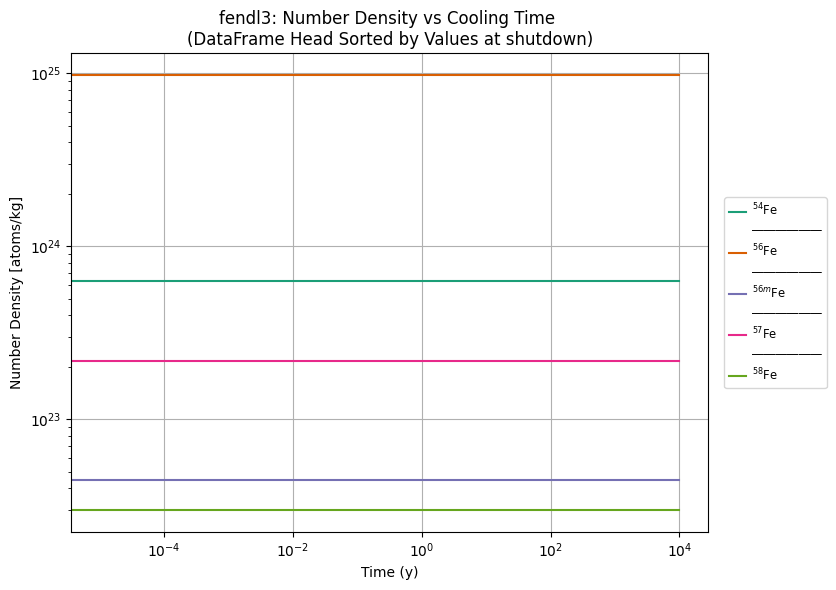

In [35]:
variable = 'Number Density'
qa.plot_single_element(
    dfs[f'fendl3 {variable}'],
    total=False,
    head=5,
    seconds=False
)

**Comparitavely plot data for FENDL2 and ALARAJOY-processed FENDL3 data**

Below are two example plots showing this comparative functionality. The first follows the above single data source number density plot, here comparing the plots for both data sets.

The second plot focuses specifically on the number density of light gas production.

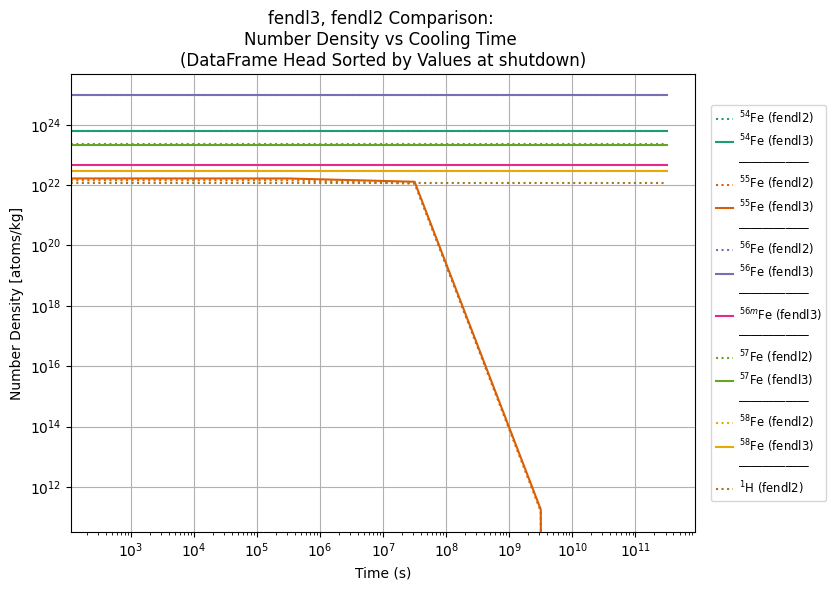

In [37]:
qa.plot_single_element(
    [dfs[f'fendl3 {variable}'], dfs[f'fendl2 {variable}']],
    head=6
)

##Iteratively compare total values for each variable##

The ALARA simulations initiated by `alarajoy_QA` produce tables tracking four variables against cooling times:

1. Number Density (atoms/kg)
2. Specific Activity (Bq/kg)
3. Total Decay Heat (W/kg)
4. Contact Dose (Sv/hr)

In reality, specific activity, total decay heat, and contact dose are all functions of number density (as well as the particular radiological properties of the produced radionuclides), however, the inclusion of these other variables in certain plotting scenarios can nonetheless prove valuable in studying particular decay patterns, such as identifying discrepancies in particular isotopic contributions to long term activity.

The following example plots show the comparison of the total values for each of these variables respectively at each cooling time across both of the data libraries.

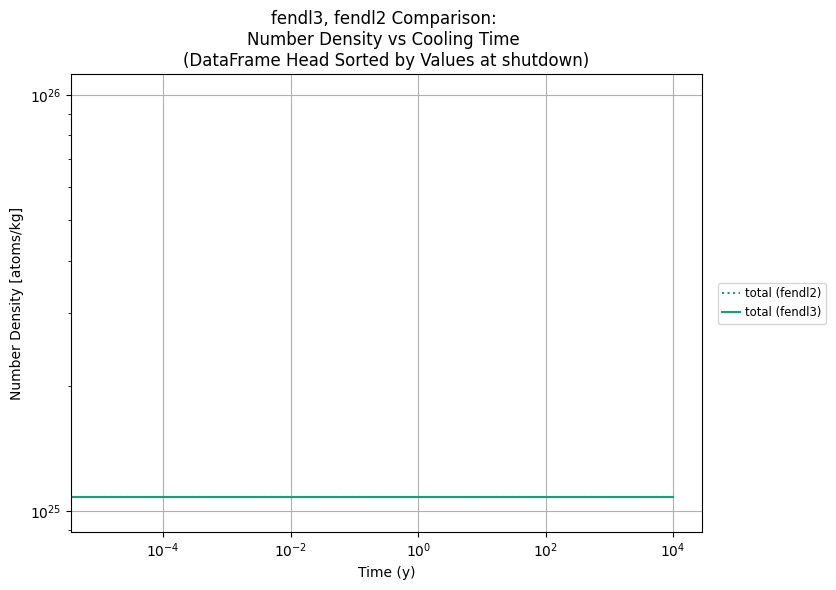

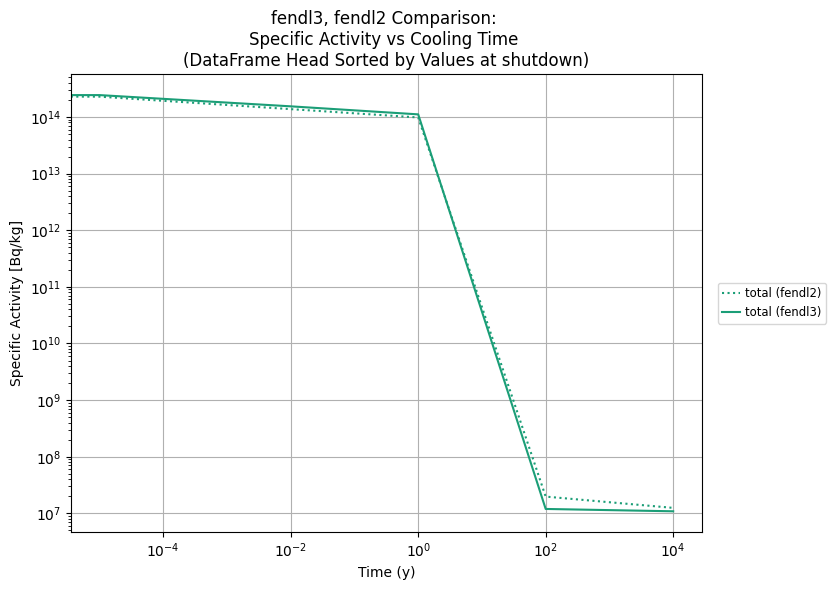

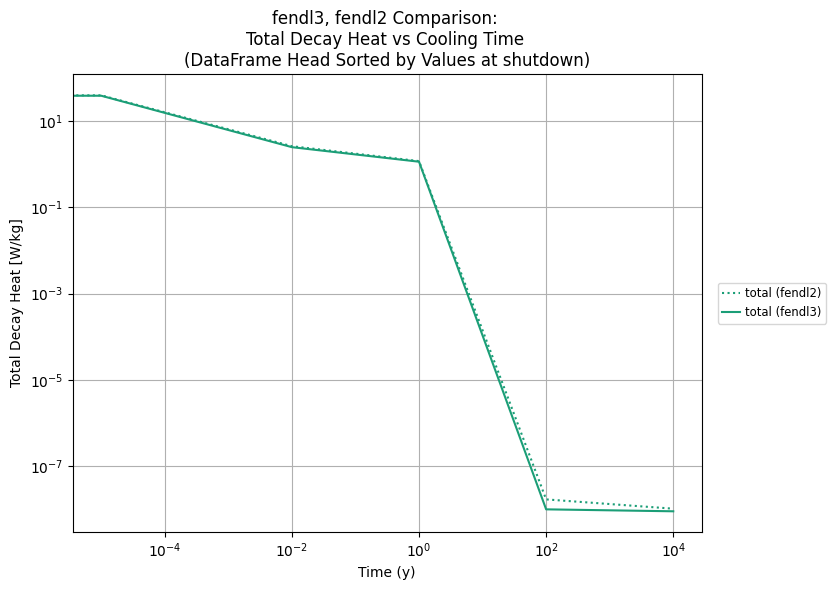

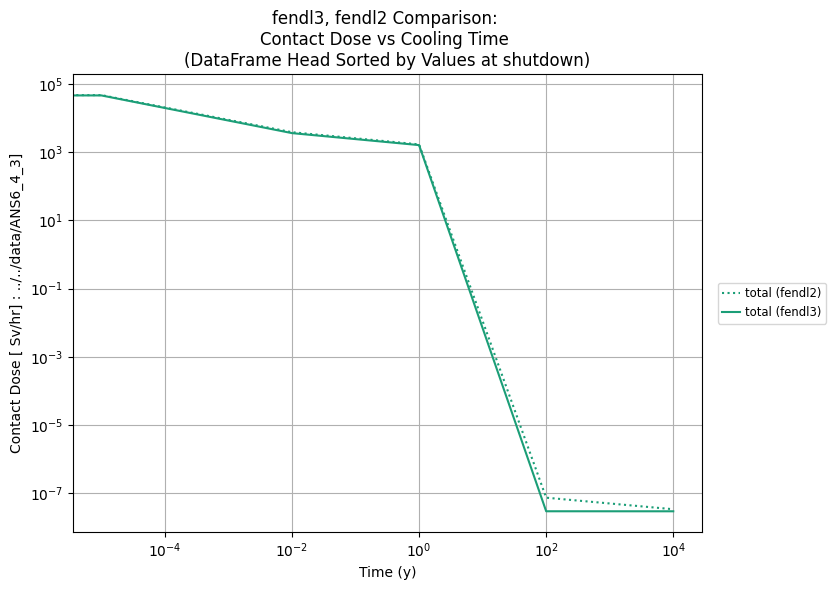

In [38]:
variables = [
     'Number Density', 'Specific Activity', 'Total Decay Heat', 'Contact Dose'
]

for variable in variables:
    qa.plot_single_element(
        [dfs[f'fendl3 {variable}'], dfs[f'fendl2 {variable}']],
        total=True,
        head=1,
        seconds=False
    )